In [1]:
import numpy as np              # Python's standard numerical library
import matplotlib.pyplot as plt # Python's scientific visualization library
from matplotlib.widgets import Cursor
import matplotlib.animation as animation
from matplotlib.path import Path
from ipywidgets import interact # interactive plots in Jupyter Notebook
import pyidi                    # Python HSC data analysis library
# from scipy.interpolate import make_interp_spline, BSpline
import pickle as pk
import os
from pixel_setter import PixelSetter, play_video

c:\Users\thijs\anaconda3\lib\site-packages\skimage\util\dtype.py:27: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  np.bool8: (False, True),


Open the file to analyze and set an analysis method (Lucas-Kanade implementation)

In [2]:
# file_name = 'Single_line_15_S01'
level_of_eccentricity   = 7     # level of eccentricity (0-7)
impact_location         = 0
camera_angle            = 0     # camera angle (0/1)
Tension                 = 30    # Tuned Tension (0.0 - 0.99 N)
impact_location         = 0     # Impact location (0 - 9)
has_mass                = 0     # has mass (0/1)
version                 = 0     # version (0/1)
# file_name = f"Full_web_ecc{str(level_of_eccentricity)}_Floc{str(impact_location)}_ca{str(camera_angle)}_T{str(Tension)}_m{str(has_mass)}_v{version}"

folder_paths = ['H:/My Drive/PHD/HSC', 'D:/HSC', 'F:/', 'E:/thijs/', 'C:/Users/thijs/Documents/HSC/']

file_name = "Full_web_ecc0_new_Floc4_v1"
file_name_video = file_name + "_S01.cihx"

# Search for the file in the folders and their subdirectories
for folder_path in folder_paths:
    for root, dirs, files in os.walk(folder_path, topdown=False):
        if file_name_video in files:
            file_path = os.path.join(root, file_name_video)
            print(file_path)
            break

# video_path = path + file_name_video +'/' + file_name_video+'.cihx'
video = pyidi.pyIDI(file_path)
# video_path = "C:/Users/thijs/Documents/GitHub/pyidi/data/"
# file_name = 'synthetic_data_thijs_without_rotation'
# video = pyidi.pyIDI(video_path + file_name +'.cih')
video.set_method('sof')
mraw = video.mraw
video.info

# ani = play_video(video, range(400,1200), interval=30)
# writer = animation.FFMpegWriter(fps=60)
# ani.save('anim/'+file_name + '_anim.mp4', writer=writer)
# print('animation generated')

# data_dir = r'C:\Users\thijs\Documents\GitHub\LDAQ\examples\Data'
# measurement_path = os.path.join(data_dir, file_name+'.pkl')
# with open(measurement_path, 'rb') as f:
#     measurement = pk.load(f)


# file_name = 'Full_web12_S01'

H:/My Drive/PHD/HSC\ecc0\web0\Full_web_ecc0_new_Floc4_v1_S01\Full_web_ecc0_new_Floc4_v1_S01.cihx
D:/HSC\ecc0\web0\Full_web_ecc0_new_Floc4_v1_S01\Full_web_ecc0_new_Floc4_v1_S01.cihx


c:\Users\thijs\anaconda3\lib\site-packages\pyMRAW.py:103: UserWarning: Clipped footage! (Total frame: 10000, Original total frame: 87371)
  warnings.warn('Clipped footage! (Total frame: {}, Original total frame: {})'.format(cih['Total Frame'], cih['Original Total Frame'] ))


{'Date': '2023/9/16',
 'Camera Type': 'FASTCAM SA-Z type 2100K-M-64GB',
 'Record Rate(fps)': 8000.0,
 'Shutter Speed(s)': 8104.0,
 'Total Frame': 10000,
 'Original Total Frame': 87371,
 'Image Width': 1024,
 'Image Height': 512,
 'File Format': 'Mraw',
 'EffectiveBit Depth': 12,
 'EffectiveBit Side': 'Higher',
 'Color Bit': 16,
 'Comment Text': ''}

Plot a frame in the video:

memmap([[ 4528,  4656,  5120, ...,  2496,  2624,  2944],
        [ 5936,  4608,  4800, ...,  3152,  2784,  2832],
        [ 9872,  6432,  5488, ...,  3920,  3072,  2992],
        ...,
        [12432, 13376, 14528, ...,   512,   496,   544],
        [12480, 13728, 14000, ...,   608,   160,   672],
        [12704, 13568, 13376, ...,   480,   720,   528]], dtype=uint16)

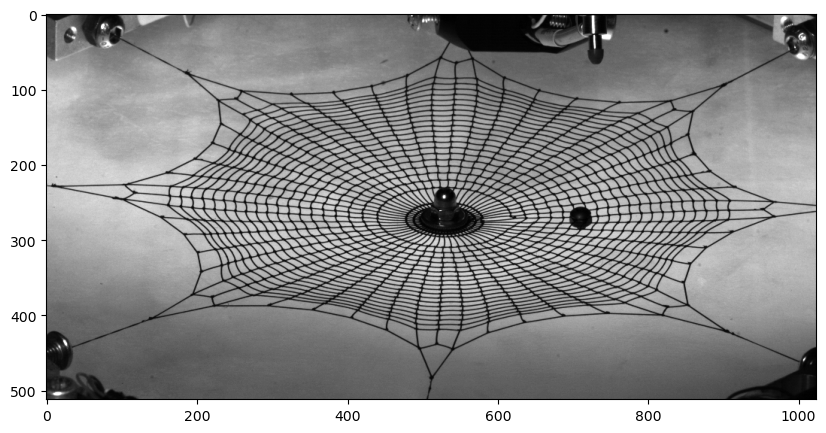

In [3]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(15, 5))
# sequential_image_n = 2580
# sequential_image_n = 518
sequential_image_n = 0
still_image = mraw[sequential_image_n]
ax.imshow(still_image, cmap='gray')
still_image

In [4]:
%matplotlib qt
ani = play_video(video, range(400,1200), interval=30)


Find the gradient off the intensity accross the still figure

In [5]:
gy, gx = np.gradient(still_image, edge_order=2)

Set limits on the Pixel intensity, Gradient x, and Gradient y to define a Region of Interest (ROI)
By drawing polygons on the figure and pressing enter, parts of the ROI can be removed.

In [6]:
%matplotlib qt
arg_pi = still_image < 70000
arg_gy = np.linalg.norm([gy, gx], axis=0) > 28000
args = arg_pi & arg_gy #| arg_gx
pix_i, pix_j = np.where(args)


pixelsetter = PixelSetter(still_image, pix_i, pix_j, file_name, sequential_image_n)
pixelsetter.set_method('by_hand')
pixelsetter.get_tracking_pixels()


In [7]:
pixelsetter.plot_histogram(inside_polygon=True)
pixelsetter.save()

In [8]:
del pixelsetter
pixelsetter = PixelSetter.load(file_name)

Since the above process can be time consuming, the code below can be used to replot the ROI

In [ ]:
# pix_i, pix_j, np.linalg.norm([gy, gx], axis=0).max()

In [ ]:
%matplotlib qt
mraw_range = (sequential_image_n, sequential_image_n+800) 
n_frames = mraw_range[1] - mraw_range[0]

# fig, ax = plt.subplots(figsize=(15, 5))
# ax.imshow(still_image, cmap='gray')
# plt.plot(pix_j, pix_i, 'r.', markersize=1)
video.set_points(np.stack((pix_i, pix_j), axis=-1))
video.set_method('sof')
video.method.configure(pixel_shift = True, mraw_range=mraw_range, subset_size=3, reference_range=(1,100))  #mraw_range=(sequential_image_n, video.N) reference_range=(1,2)
# print((video.method.start_time, video.method.stop_time))
video.show_points()


In [ ]:
%matplotlib inline
ref_img = video.method.reference(video.mraw[video.method.reference_range[0]: video.method.reference_range[1]], video.method.subset_size)
fig, ax = plt.subplots()
ax.imshow(still_image, cmap='gray')
plt.show()

In [ ]:
d = video.get_displacements()
# video.method.valid_points
d = video.displacements
d

In [ ]:
%matplotlib qt
fig, ax = plt.subplots()
for point in np.arange(d.shape[0])[video.method.valid_points]:
    ax.plot(np.arange(video.N), d[point, :, 0], label='point {} - dir 0'.format(point)) #video.info['Record Rate(fps)']*
    # ax.plot(np.arange(video.N), d[point, :, 1], label='point {} - dir 1'.format(point)) #video.info['Record Rate(fps)']*
# ax.legend()
# ax.set_ylim(-50, 50)
ax.set_xlabel('frame number')
ax.set_ylabel('displacement [pixels]')
ax.set_xlim(0, n_frames)

In [ ]:
# Add pix_i and pix_j to displacement to get the tracked position
mask = np.any(d > 3, axis=(1,2))
tp = (np.stack((pix_i, pix_j), axis=-1)).reshape(len(pix_i),1,2) + d[:,:n_frames,:]
tp[mask, :, :] = np.nan
ani = play_video(video, range(1,799), interval=60, points=tp ) #axis=([720,760],[300,230])axis = ([450,350],[460,560])
# ani = play_video(video, range(10000), interval=30)
# writer = animation.FFMpegWriter(fps=60)
# ani.save('anim/'+file_name + '_anim_wtp_zoom.mp4', writer=writer)

In [ ]:
import os

folder_path = 'H:/My Drive/PHD/HSC'
all_files_drive = []
for root, dirs, files in os.walk(folder_path):
    for file in files:
        all_files_drive.append(file)

folder_path = 'D:/HSC'
all_files_T7 = []
for root, dirs, files in os.walk(folder_path):
    for file in files:
        all_files_T7.append(file)

folder_path = 'F:/'
all_files_Sandisk = []
for root, dirs, files in os.walk(folder_path):
    for file in files:
        all_files_Sandisk.append(file)


folder_path = 'E:/thijs'
all_files_Passport = []
for root, dirs, files in os.walk(folder_path):
    for file in files:
        all_files_Passport.append(file)

folder_path = 'C:/Users/thijs/Documents/HSC'
all_files_internal = []
for root, dirs, files in os.walk(folder_path):
    for file in files:
        all_files_internal.append(file)


In [ ]:
unique_drive_files = set(all_files_drive) - set(all_files_T7) - set(all_files_Sandisk) - set(all_files_Passport) - set(all_files_internal)
unique_drive_files